In [123]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,precision_score, recall_score, confusion_matrix, f1_score, ConfusionMatrixDisplay, classification_report
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB



# Load the dataset
df = pd.read_csv('/content/seeds_dataset.csv')

# Check for any null values
print(df.isnull().sum())

area                    0
perimeter               0
compactness             3
lengthOfKernel          0
widthOfKernel           0
asymmetryCoefficient    4
lengthOfKernelGroove    0
seedType                0
dtype: int64


In [124]:
# Replace null values with the mean of each feature
df['compactness'].fillna(df['compactness'].mean(), inplace=True)
df['asymmetryCoefficient'].fillna(df['asymmetryCoefficient'].mean(), inplace=True)

# Remove rows with missing values
df = df.dropna()

# Check for any remaining null values
print(df.isnull().sum())

area                    0
perimeter               0
compactness             0
lengthOfKernel          0
widthOfKernel           0
asymmetryCoefficient    0
lengthOfKernelGroove    0
seedType                0
dtype: int64


In [125]:
df.head()

,area,perimeter,compactness,lengthOfKernel,widthOfKernel,asymmetryCoefficient,lengthOfKernelGroove,seedType
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


In [126]:
# Display the number of classes in the target class
classes = df['seedType'].unique()

for cl in classes:
  print('class => '+ str(cl))

class => 1
class => 2
class => 3


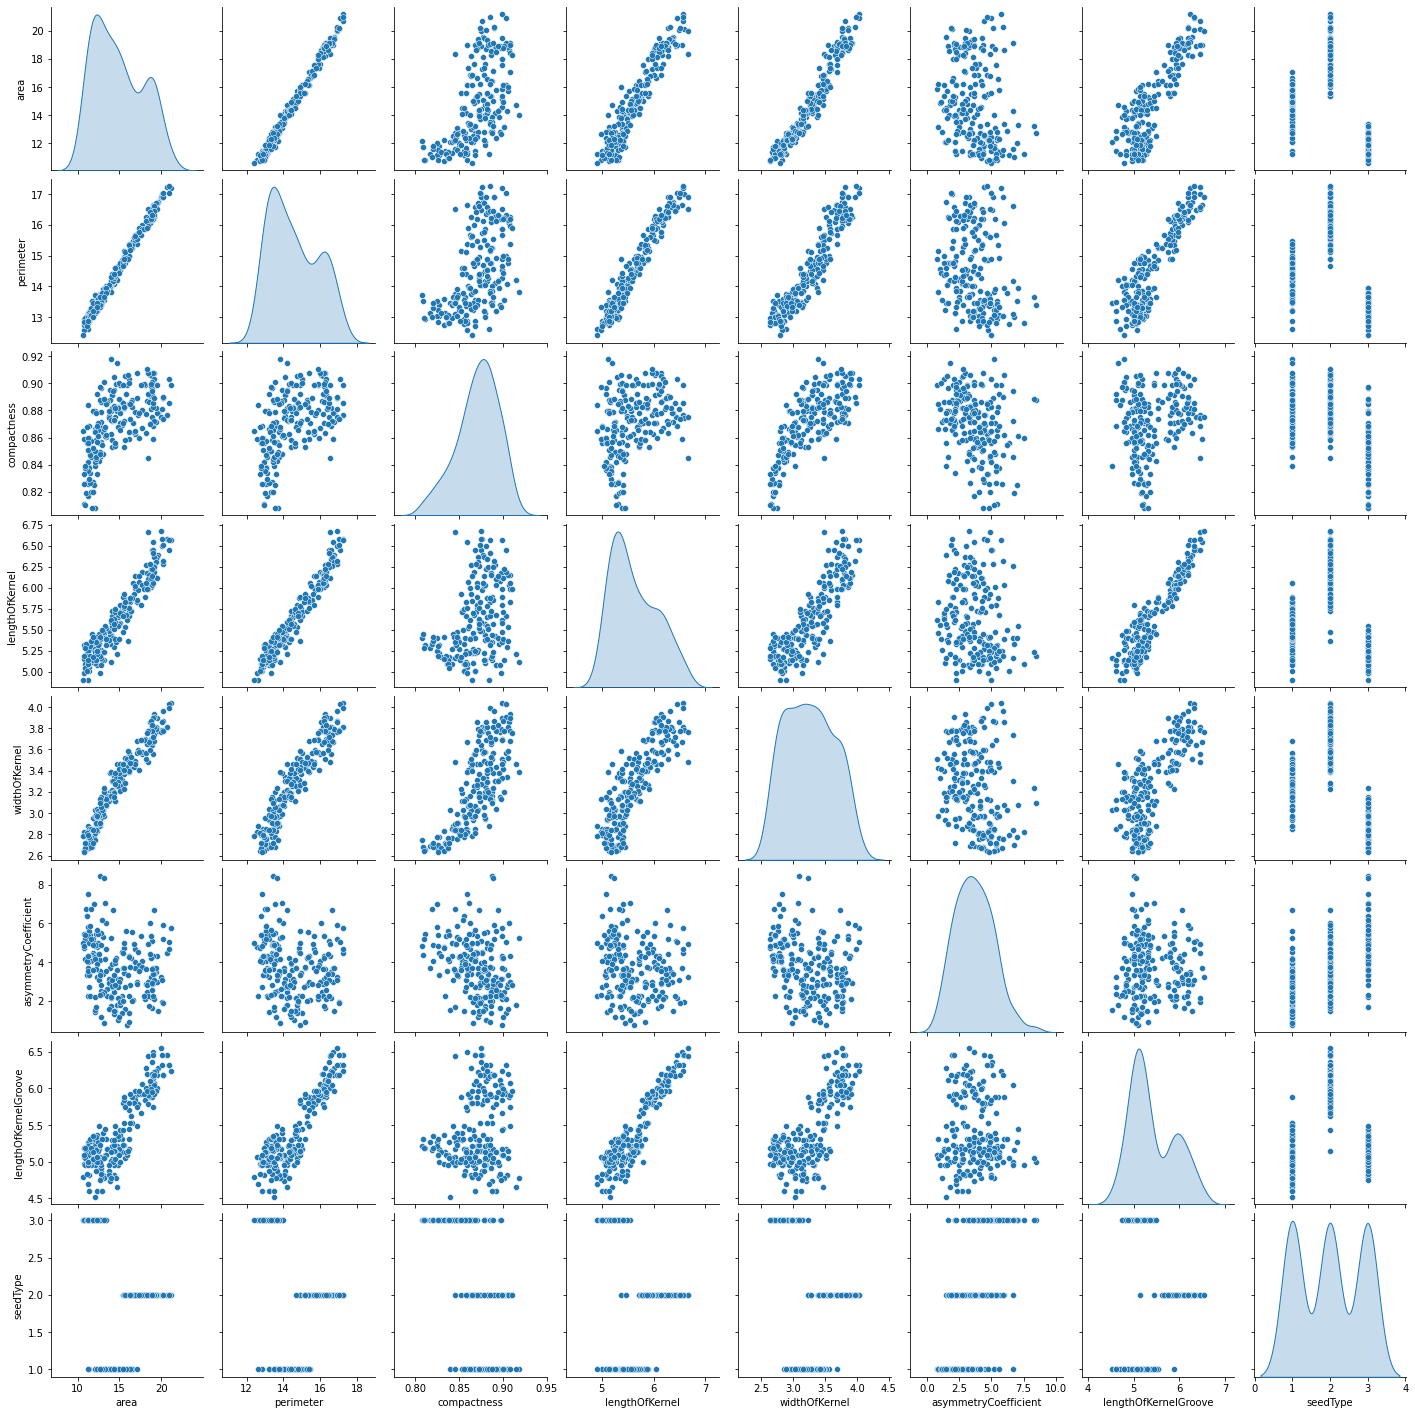

In [127]:
# Visualize the dateset
sns.pairplot(df, diag_kind = "kde")

In [128]:
# Remove one class from the dataset
new_df = df[df['seedType'] != 1]

# Display the number of classes in the target class
classes = new_df['seedType'].unique()

for cl in classes:
  print('class => '+ str(cl))

class => 2
class => 3


In [129]:
# Split the dataset into training and testing sets
train_df, test_df = train_test_split(new_df, test_size=0.2, random_state=42)

# Print the shapes of the resulting datasets
print('Training set shape:', train_df.shape)
print('Testing set shape:', test_df.shape)

Training set shape: (112, 8)
Testing set shape: (28, 8)


# KNN Algorithm 

In [130]:
# Separate the features and target variable for training and testing sets
x_train = train_df.drop('seedType', axis=1)
y_train = train_df['seedType']
X_test = test_df.drop('seedType', axis=1)
y_test = test_df['seedType']

# Create a KNN classifier object and fit it to the training data
k = 20  # number of neighbors
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(x_train, y_train)

# Make predictions on the testing data and calculate accuracy
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 1.0


<Axes: >

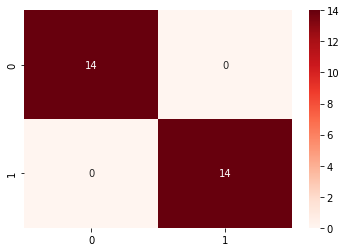

In [131]:
# Create a confusion matrix and plot it using seaborn
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='Reds')

In [132]:
# Display Report About Performance  
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           2       1.00      1.00      1.00        14
           3       1.00      1.00      1.00        14

    accuracy                           1.00        28
   macro avg       1.00      1.00      1.00        28
weighted avg       1.00      1.00      1.00        28



# SVC Algorithem

In [133]:
model=SVC()
model.fit(x_train, y_train)

SVC()

In [134]:
# Train an SVC model on the training set
svc = SVC(kernel='linear', C=1, random_state=42)
svc.fit(x_train, y_train)

# Make predictions on the testing set and evaluate accuracy
y_pred = svc.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 1.0


<Axes: >

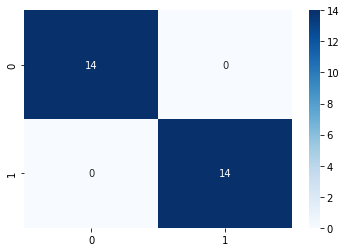

In [135]:
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using a heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

In [136]:
# Display Report About Performance  
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           2       1.00      1.00      1.00        14
           3       1.00      1.00      1.00        14

    accuracy                           1.00        28
   macro avg       1.00      1.00      1.00        28
weighted avg       1.00      1.00      1.00        28



# Naive Algorithem


In [137]:
# Initialize the Naive Bayes classifier
clf = GaussianNB()

# Fit the classifier to the training data
clf.fit(x_train, y_train)

# Make predictions on the testing data
y_pred = clf.predict(X_test)

# Compute the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy
print('Accuracy:', accuracy)

Accuracy: 1.0


<Axes: >

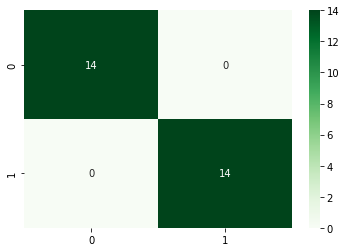

In [138]:
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')

In [139]:
# Split the dataset into training and testing sets
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

# Print the shapes of the resulting datasets
print('Training set shape:', train_df.shape)
print('Testing set shape:', test_df.shape)

Training set shape: (168, 8)
Testing set shape: (43, 8)


In [140]:
# Display Report About Performance  
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           2       1.00      1.00      1.00        14
           3       1.00      1.00      1.00        14

    accuracy                           1.00        28
   macro avg       1.00      1.00      1.00        28
weighted avg       1.00      1.00      1.00        28



# Apply the three algrorithm to all class 

# KNN Algorithm 

In [141]:
# Separate the features and target variable for training and testing sets
x_train = train_df.drop('seedType', axis=1)
y_train = train_df['seedType']
X_test = test_df.drop('seedType', axis=1)
y_test = test_df['seedType']

# Create a KNN classifier object and fit it to the training data
k = 20  # number of neighbors
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(x_train, y_train)

# Make predictions on the testing data and calculate accuracy
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.9767441860465116


<Axes: >

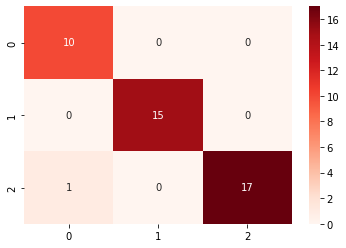

In [142]:
# Create a confusion matrix and plot it using seaborn
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='Reds')

In [143]:
# Display Report About Performance  
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.91      1.00      0.95        10
           2       1.00      1.00      1.00        15
           3       1.00      0.94      0.97        18

    accuracy                           0.98        43
   macro avg       0.97      0.98      0.97        43
weighted avg       0.98      0.98      0.98        43



# SVC Algorithem

In [144]:
model=SVC()
model.fit(x_train, y_train)

SVC()

In [145]:
# Train an SVC model on the training set
svc = SVC(kernel='linear', C=1, random_state=42)
svc.fit(x_train, y_train)

# Make predictions on the testing set and evaluate accuracy
y_pred = svc.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.9534883720930233


<Axes: >

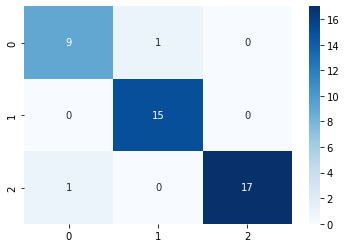

In [146]:
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using a heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

In [147]:
# Display Report About Performace  
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.90      0.90      0.90        10
           2       0.94      1.00      0.97        15
           3       1.00      0.94      0.97        18

    accuracy                           0.95        43
   macro avg       0.95      0.95      0.95        43
weighted avg       0.95      0.95      0.95        43



# Naive Algorithem


In [148]:
# Initialize the Naive Bayes classifier
clf = GaussianNB()

# Fit the classifier to the training data
clf.fit(x_train, y_train)

# Make predictions on the testing data
y_pred = clf.predict(X_test)

# Compute the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy
print('Accuracy:', accuracy)

Accuracy: 0.9302325581395349


<Axes: >

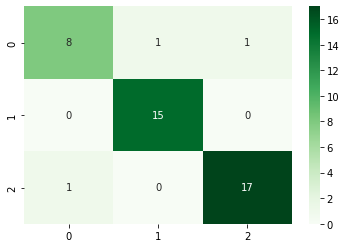

In [149]:
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')

In [150]:
# Display Report About Performance  
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.89      0.80      0.84        10
           2       0.94      1.00      0.97        15
           3       0.94      0.94      0.94        18

    accuracy                           0.93        43
   macro avg       0.92      0.91      0.92        43
weighted avg       0.93      0.93      0.93        43



# Note

# When we apply the three alogrithms to only two classes, an overfitting occured 

# The KNN classifier achieved the highest overall performance, followed by the SVM classifier and the Naive Bayes classifier.